In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [8]:
DATA_PATH = './data/'

# Tables

## Table 1
Cluster Demographics (Not complete)

Cluster | Districts | # of Households (Baskets)

## Table 2
Table 2 in thesis

## Table 3
Table 4 in thesis, 
Needs:
- Min. Pulse, millet, etc..
- Clinical Level

## Table 4
Table 5/6 in thesis, correlation (cross-crop and regional)

## Table 5
Table 7 in thesis, Costs incurred by gov't (CPLEX output)

# Figures

## Figure 1
Preference Visualization

In [9]:
Q = pd.read_csv(DATA_PATH + 'Q_interstate.csv')

## Figure 2a
Staple Preferences

Done in clustering.py

## Figure 2b
Surplus and Deficit Map

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

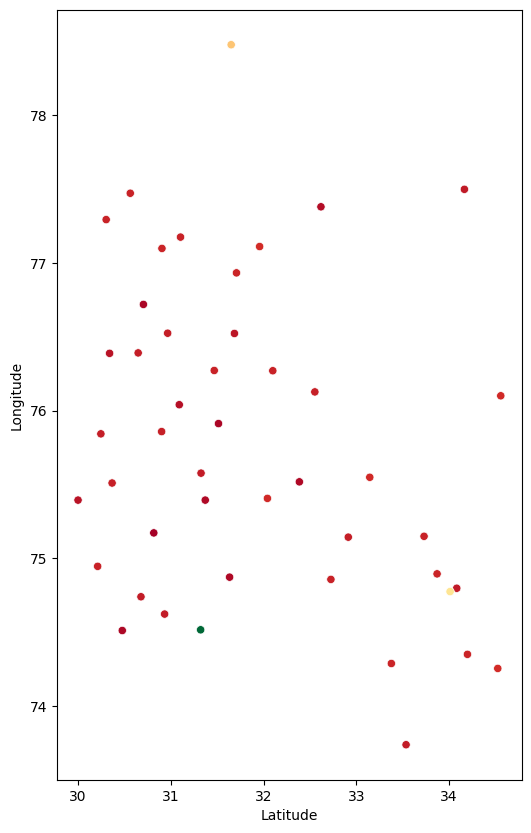

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
geo_data = pd.read_csv("../data/consumption.csv")[['Latitude', 'Longitude']][:46]
exports = pd.read_csv("data/Q_Interstate.csv", header=None, names=['from', 'to', 'crop', 'quantity'])
imports = pd.read_csv("data/S_Interstate.csv", header=None, names=['from', 'to', 'crop', 'quantity'])

# Group exports and imports
grouped_exports = exports.groupby('from')['quantity'].sum()
grouped_imports = imports.groupby('to')['quantity'].sum()

# Calculate flow_balance
flow_balance = grouped_exports.sub(grouped_imports, fill_value=0)


# Merge flow_balance with geo_data
merged_data = geo_data.merge(flow_balance.reset_index(), left_index=True, right_on='from', how='left')
merged_data.fillna(0, inplace=True)
merged_data.rename(columns={'quantity': 'flow_balance'}, inplace=True)

# Plot
plt.figure(figsize=(6, 10))
sns.scatterplot(data=merged_data, x='Longitude', y='Latitude', hue='flow_balance', palette='RdYlGn', legend=None)
plt.colorbar(label='Flow Balance')
plt.title('Flow Balance')
plt.show()

## Figure 2c
Cluster Map

Done in clustering.py

## Figure 3
Basket composition
(Horizontal bars, showing proportions. See Thesis)

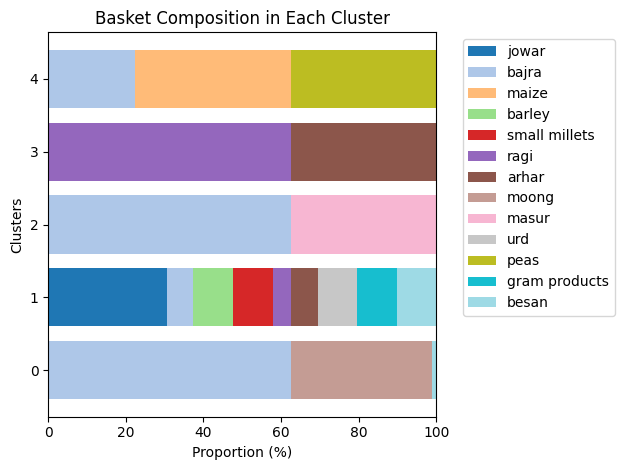

In [24]:
# Load your data from the CSV file
data = pd.read_csv("../cplex/data/basket_contents.csv")
data = data[:6]

# Set districts as index
data = data.set_index("cluster")

# Calculate total food per district
data["total_food"] = data.sum(axis=1)

# Normalize data (proportions) for each district
data_norm = data.iloc[:, :-1].div(data["total_food"], axis=0) * 100 

# Remove columns that do not contribute to any cluster
data_norm = data_norm.loc[:, (data_norm != 0).any(axis=0)]

# Get max total food for setting bar width
max_total_food = data["total_food"].max()

# Define color mapping
cmap = plt.get_cmap('tab20')  # This colormap has a unique color for each value between 0 and 1
colors = [cmap(i/(len(data_norm.columns)-1)) for i in range(len(data_norm.columns))]

def create_stacked_bar(data_norm, max_total_food, colors):
    bars = []
    for (i, (district_name, district_data)) in enumerate(data_norm.iterrows()):
        bar_start = 0
        for j, crop_amount in enumerate(district_data):
            bars.append(plt.barh(i, crop_amount, left=bar_start, color=colors[j]))
            bar_start += crop_amount
    return bars

# Create stacked bars and labels
bars = create_stacked_bar(data_norm, max_total_food, colors)

# Set labels and title
plt.xlabel("Proportion (%)")
plt.ylabel("Clusters")
plt.title("Basket Composition in Each Cluster")

# Set legend labels (adjusted to exclude zero-sum columns) and move it to the right
plt.legend([bar[0] for bar in bars], data_norm.columns, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

## Figure 4
Procurement Map